In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data loading
import pandas as pd

DATASET_PATH = 'StudentPerformanceFactors.csv'
DATASET_TARGET = 'Exam_Score'

df = pd.read_csv(DATASET_PATH)

df

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                            No            7               73   
1                            No            8               59   
2                           Yes            7               91   
3                           Yes            8               98   
4                           Yes            6               65   
...                         ...          ...              ...   
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             Yes                  0           Low   
1                 Low             Yes                  2        Medium   
2              Medium             Yes                  2        Medium   
3              Medium             Yes                  1        Medium   
4              Medium             Yes                  3        Medium   
...               ...             ...                ...           ...   
6602           Medium             Yes                  1          High   
6603           Medium             Yes                  3           Low   
6604              Low             Yes                  3           Low   
6605             High             Yes                  2           Low   
6606           Medium             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
1             Medium      Public       Negative                  4   
2             Medium      Public        Neutral                  4   
3             Medium      Public       Negative                  4   
4               High      Public        Neutral                  4   
...              ...         ...            ...                ...   
6602          Medium      Public       Positive                  2   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   
6606          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
0                       No              High School               Near   
1                       No                  College           Moderate   
2                       No             Postgraduate               Near   
3                       No              High School           Moderate   
4                       No                  College               Near   
...                    ...                      ...                ...   
6602                    No              High School             

In [3]:
categorical_vars = []
continuous_vars = []
binary_vars = []
ordinal_vars = []
dtype = []

for col in df.columns:
    unique_count = df[col].nunique()
    cols_type = None
    unique = None

    # Categorical variables
    if df[col].dtype == 'object':
        categorical_vars.append(col)
        unique = df[col].unique().tolist()

        # Binary variables
        if unique_count == 2:
            binary_vars.append(col)
            cols_type = 'Binary'

        # Ordinal and nominal variables
        elif unique_count <= 3 and df[col].dtype == 'object':
            ordinal_vars.append(col)
            cols_type = 'Ordinal'
    # Continous variables
    else:
        continuous_vars.append(col)
        cols_type = 'Continuous'

    dtype.append({
        "Name": col,
        "Type": cols_type,
        "Unique value": unique
    })

df_cols_dtype = pd.DataFrame(dtype)

df_cols_dtype

Name        Type  \
0                Hours_Studied  Continuous   
1                   Attendance  Continuous   
2         Parental_Involvement     Ordinal   
3          Access_to_Resources     Ordinal   
4   Extracurricular_Activities      Binary   
5                  Sleep_Hours  Continuous   
6              Previous_Scores  Continuous   
7             Motivation_Level     Ordinal   
8              Internet_Access      Binary   
9            Tutoring_Sessions  Continuous   
10               Family_Income     Ordinal   
11             Teacher_Quality     Ordinal   
12                 School_Type      Binary   
13              Peer_Influence     Ordinal   
14           Physical_Activity  Continuous   
15       Learning_Disabilities      Binary   
16    Parental_Education_Level     Ordinal   
17          Distance_from_Home     Ordinal   
18                      Gender      Binary   
19                  Exam_Score  Continuous   

                                 Unique value  
0                                        None  
1                                        None  
2                         [Low, Medium, High]  
3                         [High, Medium, Low]  
4                                   [No, Yes]  
5                                        None  
6                                        None  
7                         [Low, Medium, High]  
8                                   [Yes, No]  
9                                        None  
10                        [Low, Medium, High]  
11                   [Medium, High, Low, nan]  
12                          [Public, Private]  
13              [Positive, Negative, Neutral]  
14                                       None  
15                                  [No, Yes]  
16  [High School, College, Postgraduate, nan]  
17                 [Near, Moderate, Far, nan]  
18                             [Male, Female]  
19                                       None

In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [5]:
df.loc[(df[DATASET_TARGET] > 100, DATASET_TARGET)] = 100

In [6]:
X = df.drop(columns=[DATASET_TARGET])
y = df[DATASET_TARGET]

display(X)
display(y)

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                            No            7               73   
1                            No            8               59   
2                           Yes            7               91   
3                           Yes            8               98   
4                           Yes            6               65   
...                         ...          ...              ...   
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             Yes                  0           Low   
1                 Low             Yes                  2        Medium   
2              Medium             Yes                  2        Medium   
3              Medium             Yes                  1        Medium   
4              Medium             Yes                  3        Medium   
...               ...             ...                ...           ...   
6602           Medium             Yes                  1          High   
6603           Medium             Yes                  3           Low   
6604              Low             Yes                  3           Low   
6605             High             Yes                  2           Low   
6606           Medium             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
1             Medium      Public       Negative                  4   
2             Medium      Public        Neutral                  4   
3             Medium      Public       Negative                  4   
4               High      Public        Neutral                  4   
...              ...         ...            ...                ...   
6602          Medium      Public       Positive                  2   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   
6606          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  Gender  
0                       No              High School               Near    Male  
1                       No                  College           Moderate  Female  
2                       No             Postgraduate               Near    Male  
3                       No              High School           Moderate    Male  
4                       No                  College               Near  Female  
...                    ...                      ...                ...     ...  
6602           

0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 6378, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

# Create a validation set from training data for early stopping
X_train_fit, X_val, y_train_fit, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [8]:
from catboost import CatBoostRegressor, Pool
from skopt import BayesSearchCV
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
bayes_cv = BayesSearchCV(
        CatBoostRegressor(task_type='GPU', 
                          devices='0',
                          silent=False,  # Changed to False to see progress
                          eval_metric='RMSE',
                          use_best_model=True,  # Use best model based on eval set
                          early_stopping_rounds=50),  # Stop if no improvement for 50 rounds
        {
            'depth': (2, 10), 
            'iterations': (500, 2000), 
            'learning_rate': (1e-3, 0.1), 
            'l2_leaf_reg': (1, 10)
        },
        n_iter=25, cv=3, scoring='r2'
)

# Fit with eval_set
print("Starting training with R2 score tracking...")
bayes_cv.fit(X_train, y_train, 
             eval_set=[(X_test, y_test)],
             cat_features=categorical_vars) 

Starting training with R2 score tracking...
0:	learn: 3.7713000	test: 3.8136667	best: 3.8136667 (0)	total: 187ms	remaining: 3m 52s
1:	learn: 3.6519306	test: 3.6939454	best: 3.6939454 (1)	total: 266ms	remaining: 2m 44s
2:	learn: 3.5475923	test: 3.5890831	best: 3.5890831 (2)	total: 340ms	remaining: 2m 20s
3:	learn: 3.4452115	test: 3.4891517	best: 3.4891517 (3)	total: 419ms	remaining: 2m 9s
4:	learn: 3.3537989	test: 3.3977900	best: 3.3977900 (4)	total: 493ms	remaining: 2m 1s
5:	learn: 3.2742158	test: 3.3194673	best: 3.3194673 (5)	total: 567ms	remaining: 1m 56s
6:	learn: 3.2017879	test: 3.2445694	best: 3.2445694 (6)	total: 662ms	remaining: 1m 56s
7:	learn: 3.1345451	test: 3.1772468	best: 3.1772468 (7)	total: 727ms	remaining: 1m 51s
8:	learn: 3.0699460	test: 3.1111736	best: 3.1111736 (8)	total: 796ms	remaining: 1m 48s
9:	learn: 3.0115845	test: 3.0543936	best: 3.0543936 (9)	total: 860ms	remaining: 1m 45s
10:	learn: 2.9555320	test: 3.0019033	best: 3.0019033 (10)	total: 940ms	remaining: 1m 45s

BayesSearchCV(cv=3,
              estimator=<catboost.core.CatBoostRegressor object at 0x00000207F2E367B0>,
              n_iter=25, scoring='r2',
              search_spaces={'depth': (2, 10), 'iterations': (500, 2000),
                             'l2_leaf_reg': (1, 10),
                             'learning_rate': (0.001, 0.1)})

Training model with best parameters for R2 score visualization...
Best parameters: OrderedDict({'depth': 2, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1})



Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	learn: 0.0729023	test: 0.0615036	best: 0.0615036 (0)	total: 22.7ms	remaining: 11.3s
1:	total: 41.8ms	remaining: 10.4s
2:	total: 57.4ms	remaining: 9.51s
3:	total: 74ms	remaining: 9.18s
4:	total: 90.6ms	remaining: 8.96s
5:	learn: 0.2983889	test: 0.2597706	best: 0.2597706 (5)	total: 107ms	remaining: 8.81s
6:	total: 124ms	remaining: 8.75s
7:	total: 141ms	remaining: 8.69s
8:	total: 158ms	remaining: 8.65s
9:	total: 179ms	remaining: 8.78s
10:	learn: 0.4078010	test: 0.3568707	best: 0.3568707 (10)	total: 201ms	remaining: 8.92s
11:	total: 225ms	remaining: 9.13s
12:	total: 251ms	remaining: 9.39s
13:	total: 276ms	remaining: 9.58s
14:	total: 299ms	remaining: 9.68s
15:	learn: 0.4661179	test: 0.4082792	best: 0.4082792 (15)	total: 335ms	remaining: 10.1s
16:	total: 361ms	remaining: 10.2s
17:	total: 386ms	remaining: 10.3s
18:	total: 410ms	remaining: 10.4s
19:	total: 433ms	remaining: 10.4s
20:	learn: 0.5031730	test: 0.4385873	best: 0.4385873 (20)	total: 458ms	remaining: 10.4s
21:	total: 479ms	remainin

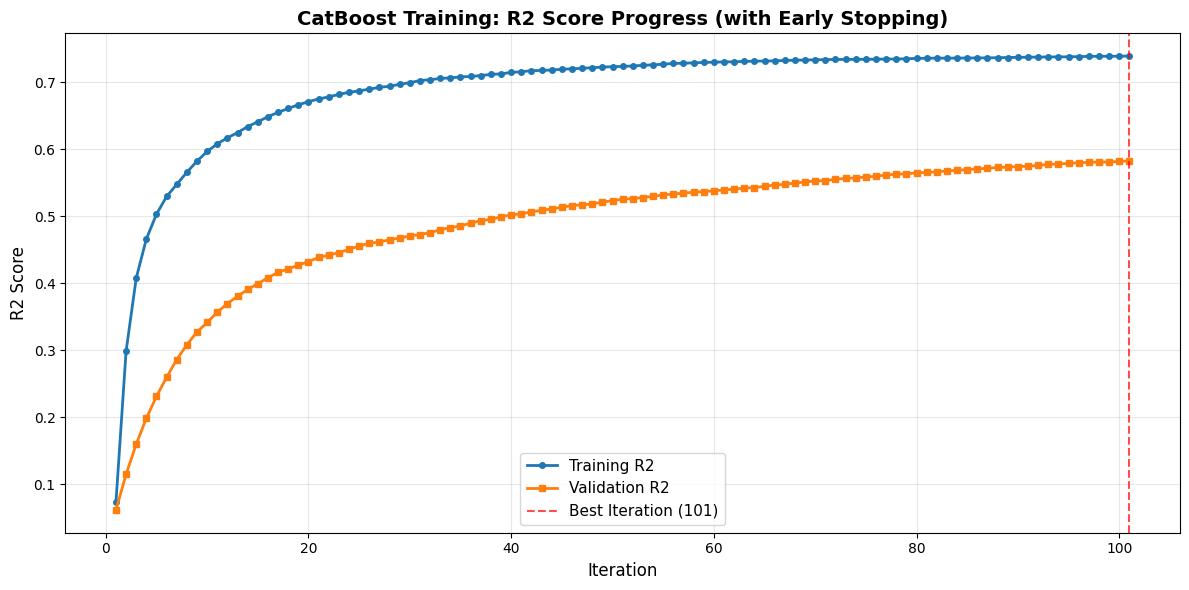


Best Iteration (plotted range): 101
Best Validation R2 (plotted range): 0.5828
Final Training R2 (plotted): 0.7393
Final Validation R2 (plotted): 0.5828

Model stopped at iteration 500 (early stopping prevented overfitting)


In [9]:
# Train a model with best parameters to get training history for plotting R2 scores
from sklearn.metrics import r2_score

# Get best parameters from BayesSearchCV
best_params = bayes_cv.best_params_

print("Training model with best parameters for R2 score visualization...")
print(f"Best parameters: {best_params}\n")

# Create a model with best parameters using R2 as evaluation metric
model_r2 = CatBoostRegressor(
    task_type='GPU',
    devices='0',
    silent=False,
    eval_metric='R2',  # Use R2 as evaluation metric
    use_best_model=True,
    early_stopping_rounds=50,  # Early stopping to prevent overfitting
    **best_params
)

# Train with eval_set to track R2 scores at each iteration (using explicit validation split)
model_r2.fit(
    X_train_fit, y_train_fit,
    eval_set=[(X_val, y_val)],
    cat_features=categorical_vars,
    plot=False  # We'll create our own plot
)

# Get R2 scores from evaluation results
evals_result_r2 = model_r2.get_evals_result()

# Extract R2 scores
train_r2 = evals_result_r2['learn']['R2']
# Depending on CatBoost version, the validation key can be 'validation' or 'validation_0'
val_key = 'validation' if 'validation' in evals_result_r2 else 'validation_0'
val_r2 = evals_result_r2[val_key]['R2']

# Make sure x (iterations) and y (scores) have the same length
len_train = len(train_r2)
len_val = len(val_r2)
min_len = min(len_train, len_val)

train_r2_plot = train_r2[:min_len]
val_r2_plot = val_r2[:min_len]
iterations = list(range(1, min_len + 1))

# Find the best iteration (where validation R2 was highest, within the plotted range)
best_iteration_idx = val_r2_plot.index(max(val_r2_plot))
best_iteration = best_iteration_idx + 1

# Plot R2 scores
plt.figure(figsize=(12, 6))
plt.plot(iterations, train_r2_plot, label='Training R2', marker='o', linewidth=2, markersize=4)
plt.plot(iterations, val_r2_plot, label='Validation R2', marker='s', linewidth=2, markersize=4)
plt.axvline(x=best_iteration, color='red', linestyle='--', linewidth=1.5, 
            label=f'Best Iteration ({best_iteration})', alpha=0.7)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)
plt.title('CatBoost Training: R2 Score Progress (with Early Stopping)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nBest Iteration (plotted range): {best_iteration}")
print(f"Best Validation R2 (plotted range): {max(val_r2_plot):.4f}")
print(f"Final Training R2 (plotted): {train_r2_plot[-1]:.4f}")
print(f"Final Validation R2 (plotted): {val_r2_plot[-1]:.4f}")
print(f"\nModel stopped at iteration {len(val_r2)} (early stopping prevented overfitting)")


In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return r2_square, mae, rmse, 

In [11]:
print(evaluate_model(y_test, bayes_cv.predict(X_test)))

(0.7257864026294609, 0.5895298770251229, np.float64(2.0642417991576223))
